In [ ]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Creating the Dataframe from the datafile
Text_df = pd.read_csv('MI_Note5_Reviews_Amazon_subset.csv')
Text_df.head()

,Product,Review_Subject,Review_Detail,Review_date,Rating,Product_spec,Purchaser,Reviewer,Usefulness
0,Mi Note 5,Hands are getting vibrated when keep in hand f...,"Hi all,\nWhen we just keep the mobile in hand ...",10-Sep-18,1.0 out of 5 stars,Colour: GoldSize: 32 GB,Verified Purchase,shiva,19 people found this helpful
1,Mi Note 5,dont buy the REDMI 5,its automatically rebooting and freezing 20 to...,19-Sep-18,1.0 out of 5 stars,Colour: BlackSize: 64 GB,Verified Purchase,Amazon Customer,13 people found this helpful
2,Mi Note 5,Product for average price with best Quality..!,Battery backup is too good\nyou can play hd ga...,25-Sep-18,4.0 out of 5 stars,Colour: BlackSize: 32 GB,Verified Purchase,Prasannakumar Nair,15 people found this helpful
3,Mi Note 5,Great phone @ super great price,Best in the segment. I ordered it for my siste...,21-Sep-18,5.0 out of 5 stars,Colour: BlackSize: 32 GB,Verified Purchase,D. Dhondiyal,6 people found this helpful
4,Mi Note 5,Fast working phone.,I love xiaomi product because I am using Mi Ma...,06-Aug-18,5.0 out of 5 stars,Colour: GoldSize: 64 GB,Verified Purchase,PARMANAND MAURYA,6 people found this helpful


In [ ]:
list(Text_df)

['Product',
 'Review_Subject',
 'Review_Detail',
 'Review_date',
 'Rating',
 'Product_spec',
 'Purchaser',
 'Reviewer',
 'Usefulness']

In [ ]:
Text_df.shape

(349, 9)

In [ ]:
Text_df.drop(['Product','Product_spec','Purchaser','Reviewer','Usefulness'],axis=1,inplace=True)

#### Word Count Distribution Function

In [ ]:
import nltk
from nltk import FreqDist 

In [ ]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()

  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

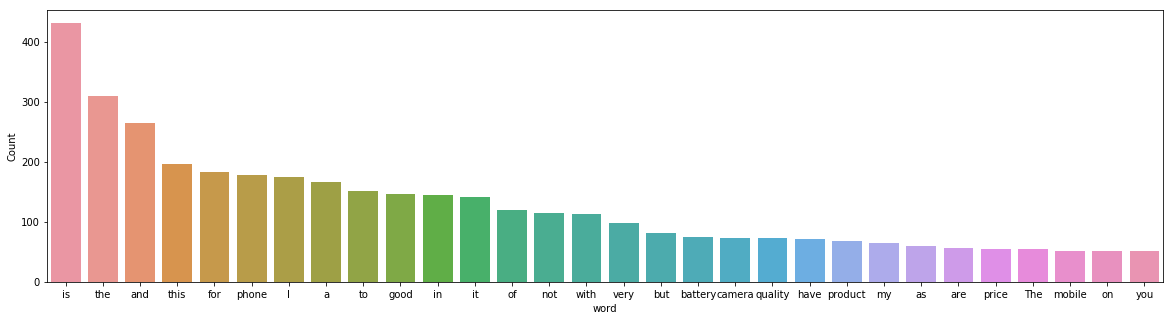

In [ ]:
# Checking the Word Frequency before the processing
freq_words(Text_df['Review_Detail'].astype(str))

In [ ]:
# Rating is fixed against a scale of 5 points
Text_df['Rating'].head(5)

0    1.0 out of 5 stars
1    1.0 out of 5 stars
2    4.0 out of 5 stars
3    5.0 out of 5 stars
4    5.0 out of 5 stars
Name: Rating, dtype: object

In [ ]:
# Removing the Text from Rating
Text_df['Cust_rating']=Text_df['Rating'].str.replace(' out of 5 stars', ' ')
Text_df['Cust_rating'].head()

0    1.0 
1    1.0 
2    4.0 
3    5.0 
4    5.0 
Name: Cust_rating, dtype: object

In [ ]:
# Dropping the Rating Column
Text_df.drop(['Rating'],axis=1,inplace=True)

In [ ]:
Text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 4 columns):
Review_Subject    349 non-null object
Review_Detail     349 non-null object
Review_date       349 non-null object
Cust_rating       349 non-null object
dtypes: object(4)
memory usage: 11.0+ KB


### Feature Extraction -  Step-1

In [ ]:
# Word Count
Text_df['word_count_pre'] = Text_df['Review_Detail'].apply(lambda x: len(str(x).split(" ")))
Text_df[['Review_Detail','word_count_pre']].head()

,Review_Detail,word_count_pre
0,"Hi all,\nWhen we just keep the mobile in hand ...",73
1,its automatically rebooting and freezing 20 to...,64
2,Battery backup is too good\nyou can play hd ga...,56
3,Best in the segment. I ordered it for my siste...,61
4,I love xiaomi product because I am using Mi Ma...,27


In [ ]:
# Char Count
Text_df['char_count_pre'] = Text_df['Review_Detail'].str.len()
Text_df[['Review_Detail','word_count_pre','char_count_pre']].head()

,Review_Detail,word_count_pre,char_count_pre
0,"Hi all,\nWhen we just keep the mobile in hand ...",73,397
1,its automatically rebooting and freezing 20 to...,64,365
2,Battery backup is too good\nyou can play hd ga...,56,327
3,Best in the segment. I ordered it for my siste...,61,334
4,I love xiaomi product because I am using Mi Ma...,27,135


### Text Pre-Processing (Step-1)

In [ ]:
# Converting All the Text to Lower Case
Text_df['Review_Detail'] = (Text_df['Review_Detail'].astype(str)).apply(lambda x: " ".join(x.lower() for x in x.split()))
Text_df['Review_Detail'].head()

0    hi all, when we just keep the mobile in hand f...
1    its automatically rebooting and freezing 20 to...
2    battery backup is too good you can play hd gam...
3    best in the segment. i ordered it for my siste...
4    i love xiaomi product because i am using mi ma...
Name: Review_Detail, dtype: object

In [ ]:
#Replacing the Special Characters. Retaining only the Alphabets and Numbers
Text_df['Review_Detail'] = Text_df['Review_Detail'].str.replace('\W+', ' ')
Text_df['Review_Detail'].head() 

0    hi all when we just keep the mobile in hand fo...
1    its automatically rebooting and freezing 20 to...
2    battery backup is too good you can play hd gam...
3    best in the segment i ordered it for my sister...
4    i love xiaomi product because i am using mi ma...
Name: Review_Detail, dtype: object

## Feature Extraction -  Step-2

In [ ]:
# Word Count
Text_df['word_count'] = Text_df['Review_Detail'].apply(lambda x: len(str(x).split(" ")))
Text_df[['Review_Detail','word_count']].head()

,Review_Detail,word_count
0,hi all when we just keep the mobile in hand fo...,80
1,its automatically rebooting and freezing 20 to...,65
2,battery backup is too good you can play hd gam...,64
3,best in the segment i ordered it for my sister...,63
4,i love xiaomi product because i am using mi ma...,28


In [ ]:
# Char Count
Text_df['char_count'] = Text_df['Review_Detail'].str.len()
Text_df[['Review_Detail','word_count','char_count']].head()

,Review_Detail,word_count,char_count
0,hi all when we just keep the mobile in hand fo...,80,388
1,its automatically rebooting and freezing 20 to...,65,355
2,battery backup is too good you can play hd gam...,64,322
3,best in the segment i ordered it for my sister...,63,326
4,i love xiaomi product because i am using mi ma...,28,135


In [ ]:
# Identifying the Stop words Count
from nltk.corpus import stopwords
stop = stopwords.words('english')
 
Text_df['stopwords'] = Text_df['Review_Detail'].apply(lambda x: len([x for x in x.split() if x in stop]))
Text_df[['Review_Detail','stopwords']].head()

,Review_Detail,stopwords
0,hi all when we just keep the mobile in hand fo...,45
1,its automatically rebooting and freezing 20 to...,28
2,battery backup is too good you can play hd gam...,23
3,best in the segment i ordered it for my sister...,28
4,i love xiaomi product because i am using mi ma...,12


In [ ]:
# Identifying the number of Numerics
Text_df['numerics'] = Text_df['Review_Detail'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
Text_df[['Review_Detail','numerics']].head()

,Review_Detail,numerics
0,hi all when we just keep the mobile in hand fo...,1
1,its automatically rebooting and freezing 20 to...,5
2,battery backup is too good you can play hd gam...,0
3,best in the segment i ordered it for my sister...,1
4,i love xiaomi product because i am using mi ma...,1


In [ ]:
# Printing the Dataframe - after first step of pre-processing
Text_df.head(5)

,Review_Subject,Review_Detail,Review_date,Cust_rating,word_count_pre,char_count_pre,word_count,char_count,stopwords,numerics
0,Hands are getting vibrated when keep in hand f...,hi all when we just keep the mobile in hand fo...,10-Sep-18,1.0,73,397,80,388,45,1
1,dont buy the REDMI 5,its automatically rebooting and freezing 20 to...,19-Sep-18,1.0,64,365,65,355,28,5
2,Product for average price with best Quality..!,battery backup is too good you can play hd gam...,25-Sep-18,4.0,56,327,64,322,23,0
3,Great phone @ super great price,best in the segment i ordered it for my sister...,21-Sep-18,5.0,61,334,63,326,28,1
4,Fast working phone.,i love xiaomi product because i am using mi ma...,06-Aug-18,5.0,27,135,28,135,12,1


### Text Pre-Processing -2

In [ ]:
## Removing the Stop Words
from nltk.corpus import stopwords
stop = stopwords.words('english')
Text_df['Review_Detail'] = Text_df['Review_Detail'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Text_df['Review_Detail'].head()

0    hi keep mobile hand 1 minute use hands getting...
1    automatically rebooting freezing 20 30 times d...
2    battery backup good play hd games free lags li...
3    best segment ordered sister rakshabandhan casu...
4    love xiaomi product using mi max feb 2017 comp...
Name: Review_Detail, dtype: object

In [ ]:
# Performing the Text Correction before removing the Rare words

In [ ]:
!pip install textblob
from textblob import TextBlob
Text_df['Review_Detail'] = Text_df['Review_Detail'].apply(lambda x: str(TextBlob(x).correct()))

In [ ]:
# Performing Lemmation to convert the words to their Root Words
!pip install nltk
from textblob import Word
Text_df['Review_Detail'] = Text_df['Review_Detail'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [ ]:
# Checking for least Freq Words
freq = pd.Series(' '.join(Text_df['Review_Detail']).split()).value_counts()[-20:]
freq

fool         1
edited       1
wallpaper    1
supposed     1
detriment    1
ne           1
opinion      1
lovely       1
cloudtail    1
encounter    1
rock         1
expanded     1
coronet      1
frame        1
shorter      1
e            1
hard         1
drainage     1
promised     1
aspect       1
dtype: int64

In [ ]:
# Removing the Rare Frequency words since they do not influence much
freq = list(freq.index)
Text_df['Review_Detail'] = Text_df['Review_Detail'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
Text_df['Review_Detail'].head()

0    hi keep mobile hand 1 minute use hand getting ...
1    automatically reporting freezing 20 30 time da...
2    battery back good play he game free law like p...
3    best segment ordered sister rakshabandhan casu...
4    love xiaomi product using mi max feb 2017 comp...
Name: Review_Detail, dtype: object

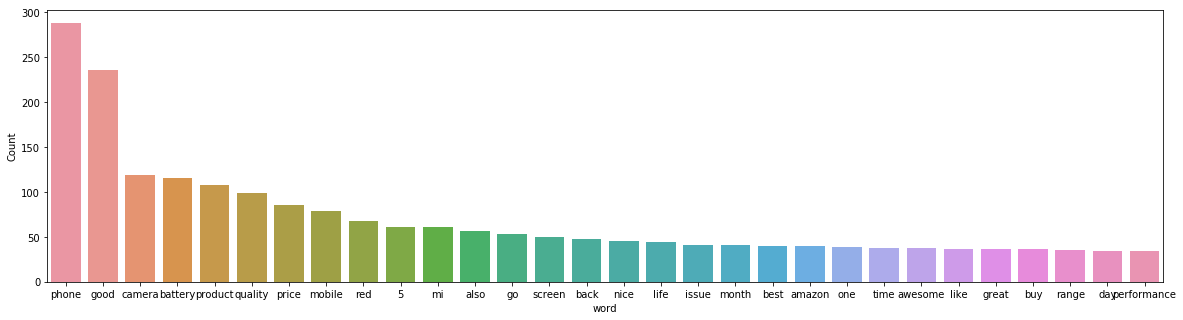

In [ ]:
freq_words(Text_df['Review_Detail'].astype(str))

In [ ]:
# Performing the Word Count after TExt processing
Text_df['word_count_post'] = Text_df['Review_Detail'].apply(lambda x: len(str(x).split(" ")))
# Char Count
Text_df['char_count_post'] = Text_df['Review_Detail'].str.len()
Text_df[['Review_Detail','word_count_pre','word_count_post','char_count','char_count_post']].head()

,Review_Detail,word_count_pre,word_count_post,char_count,char_count_post
0,hi keep mobile hand 1 minute use hand getting ...,73,35,388,218
1,automatically reporting freezing 20 30 time da...,64,36,355,239
2,battery back good play he game free law like p...,56,40,322,223
3,best segment ordered sister rakshabandhan casu...,61,34,326,228
4,love xiaomi product using mi max feb 2017 comp...,27,15,135,83
